In [1]:
import pandas as pd
import metnum
import numpy as np
from utils import *
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from utils import graficarPropXPrecio, cmlConKFold, cml

df = pd.read_csv('../data/train.csv')

# Entrando en contacto con el dataset


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          240000 non-null  int64  
 1   titulo                      234613 non-null  object 
 2   descripcion                 238381 non-null  object 
 3   tipodepropiedad             239954 non-null  object 
 4   direccion                   186928 non-null  object 
 5   ciudad                      239628 non-null  object 
 6   provincia                   239845 non-null  object 
 7   antiguedad                  196445 non-null  float64
 8   habitaciones                217529 non-null  float64
 9   garages                     202235 non-null  float64
 10  banos                       213779 non-null  float64
 11  metroscubiertos             222600 non-null  float64
 12  metrostotales               188533 non-null  float64
 13  idzona        

In [3]:
df['provincia'].value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

In [4]:


df_df = df[df['provincia']=='Distrito Federal']
df_emex = df[df['provincia']=='Edo. de México']
df_jal = df[df['provincia']=='Jalisco']
df_nuli = df[df['provincia']=='Nuevo León']
df_yuca = df[df['provincia']=='Yucatán']
df_chi = df[df['provincia']=='Chihuahua']
df_sin = df[df['provincia']=='Sinaloa']
df_col = df[df['provincia']=='Colima']

# df_df = df[df['provincia']=='Distrito Federal'].fillna(0)
# df_emex = df[df['provincia']=='Edo. de México'].fillna(0)
# df_jal = df[df['provincia']=='Jalisco'].fillna(0)
# dfj = df_df.groupby('antiguedad')[['precio']].mean() 
# dfj['size'] = df_df.groupby('antiguedad')[['precio']].size()
# print(dfj)


### IDEAS FALLIDAS PARA DESAPARECER CELDAS DE ANTEMANO

#### Funcion que desaparece todo de antemano

In [5]:
# from IPython.display import HTML
# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# The raw code for this IPython notebook is by default hidden for easier reading.
# To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

#### Funcion que te desaparece una sola celda pero no de antemano y con un botón medio feo

In [6]:
# from IPython.core.display import display,HTML
# toggle_code_str = '''
# <form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Sloution"></form>
# '''

# toggle_code_prepare_str = '''
#     <script>
#     function code_toggle() {
#         if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
#             $('div.cell.code_cell.rendered.selected div.input').hide();
#         } else {
#             $('div.cell.code_cell.rendered.selected div.input').show();
#         }
#     }
#     </script>

# '''

# display(HTML(toggle_code_prepare_str + toggle_code_str))

# def toggle_code():
#     display(HTML(toggle_code_str))

#### Funcion que desaparece cualquier celda que tenga el comentario # @hidden pero te deja el link para reaparecer la celda en cualquier lado.

In [7]:
# # @hidden
# from IPython.display import HTML
# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('.cm-comment:contains(@hidden)').closest('div.input').hide();
#  } else {
#  $('.cm-comment:contains(@hidden)').closest('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# The raw code for this IPython notebook is by default hidden for easier reading.
# To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

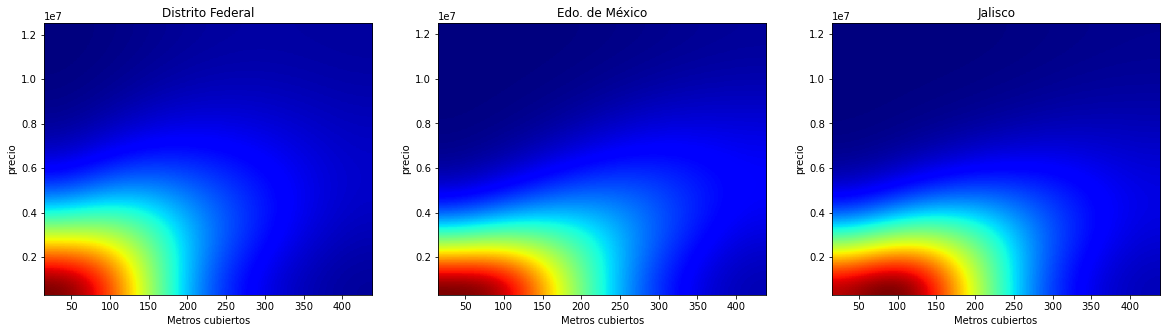

In [9]:
def dfs(prop):
    return [df_df.dropna(subset=[prop]), df_emex.dropna(subset=[prop]), df_jal.dropna(subset=[prop])]
nombres = ["Distrito Federal", "Edo. de México", "Jalisco"]
graficarPropXPrecio('metroscubiertos', "Metros cubiertos", dfs('metroscubiertos'), nombres)

oculta_celdas()

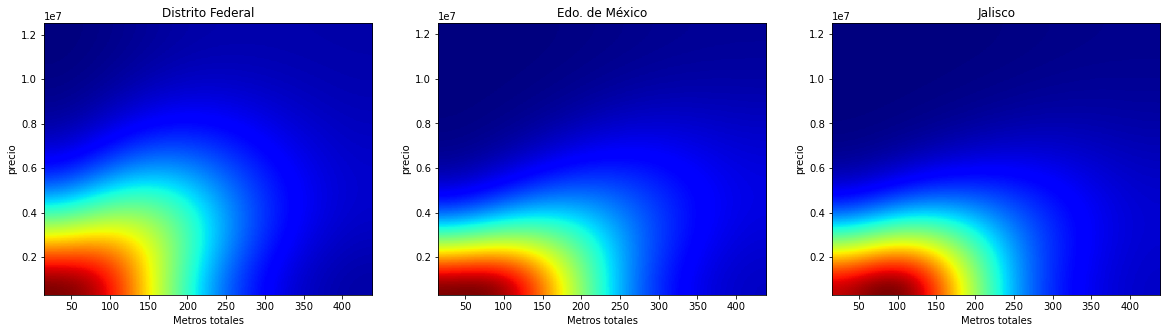

In [10]:
graficarPropXPrecio('metrostotales', "Metros totales", dfs('metrostotales'), nombres)

## Analizando la relación de distintas variables con el precio del inmueble

En esta sección nos dispondremos a estudiar variables que creemos que podrian ser un factor determinante a la hora de estimar el precio de un inmueble. Segmentaremos los datos por provincia y trabajaremos con aquellas provincias de las que tenemos más información, que son *Distrito Federal*, *Edo. de México* y *Jalisco*.

* Relación piscina-precio

In [52]:
DF = df_df.rename(columns={'precio':'precioPromedio'}).groupby('piscina')[['precioPromedio']].mean()
DF['#deMuestras'] = df_df.groupby('piscina')[['precio']].size()
EM = df_emex.rename(columns={'precio':'precioPromedio'}).groupby('piscina')[['precioPromedio']].mean()
EM['#deMuestras'] = df_emex.groupby('piscina')[['precio']].size()
JA = df_jal.rename(columns={'precio':'precioPromedio'}).groupby('piscina')[['precioPromedio']].mean()
JA['#deMuestras'] = df_jal.groupby('piscina')[['precio']].size()

print("\033[4mDistrito Federal\033[0m")
print(DF)
print("\n")
print("\033[4mEdo. de México\033[0m")
print(EM)
print("\n")
print("\033[4mJalisco\033[0m")
print(JA)
o = 3.277998e+06 - 2.247232e+06
d = 4.712864e+06 - 2.646763e+06
e = 5.333006e+06 - 3.384644e+06
print("\n\n")
print("Aumento promedio de precioPromedio: ",(o + d + e)/3)

oculta_celdas()

Distrito Federal
         precioPromedio  #deMuestras
piscina                             
0.0        3.384644e+06        56163
1.0        5.333006e+06         2627


Edo. de México
         precioPromedio  #deMuestras
piscina                             
0.0        2.646763e+06        39277
1.0        4.712864e+06         2330


Jalisco
         precioPromedio  #deMuestras
piscina                             
0.0        2.247232e+06        18756
1.0        3.277998e+06         2482



Aumento promedio de precioPromedio:  1681743.0


Evidentemente en todas las provincias el hecho de que el inmueble tenga piscina es determinante a la hora de definir su precio. Reflejandose la presencia de piscina en un aumento promedio del precio del inmueble de aproximadamente un millón y medio de pesos. Sin embargo, es importante notar la gran diferencia en tamaño de datos que existe entre los inmuebles con piscina y los que no. Estos últimos representando como máximo un 11.7% (en Jalisco) de los inmuebles totales.  

* Relación gimnasio-precio

In [53]:
DF = df_df.rename(columns={'precio':'precioPromedio'}).groupby('gimnasio')[['precioPromedio']].mean()
DF['#deMuestras'] = df_df.groupby('gimnasio')[['precio']].size()
EM = df_emex.rename(columns={'precio':'precioPromedio'}).groupby('gimnasio')[['precioPromedio']].mean()
EM['#deMuestras'] = df_emex.groupby('gimnasio')[['precio']].size()
JA = df_jal.rename(columns={'precio':'precioPromedio'}).groupby('gimnasio')[['precioPromedio']].mean()
JA['#deMuestras'] = df_jal.groupby('gimnasio')[['precio']].size()
print("\033[4mDistrito Federal\033[0m")
print(DF)
print("\n")
print("\033[4mEdo. de México\033[0m")
print(EM)
print("\n")
print("\033[4mJalisco\033[0m")
print(JA)
print("\n\n")
o = 3.835011e+06 - 2.268564e+06
d = 4.338775e+06 - 2.637067e+06
e = 4.710750e+06 - 3.371224e+06
print("Aumento promedio de precioPromedio: ",(o + d + e)/3)

oculta_celdas()

Distrito Federal
          precioPromedio  #deMuestras
gimnasio                             
0.0         3.371224e+06        54380
1.0         4.710750e+06         4410


Edo. de México
          precioPromedio  #deMuestras
gimnasio                             
0.0         2.637067e+06        38541
1.0         4.338775e+06         3066


Jalisco
          precioPromedio  #deMuestras
gimnasio                             
0.0         2.268564e+06        19894
1.0         3.835011e+06         1344



Aumento promedio de precioPromedio:  1535893.6666666667


Para el caso de los gimnasios también es claro que condicionan fuertemente el precio del inmueble, rondando el aumento promedio del precio masomenos al mismo nivel que las piscinas. Pero nuevamente hay que tener en consideración que la cantidad de datos que tenemos de inmuebles con gimnasio es muchisimo menor que la de inmuebles sin el mismo.

* Relación escuelascercanas-precio

In [54]:
DF = df_df.rename(columns={'precio':'precioPromedio'}).groupby('escuelascercanas')[['precioPromedio']].mean()
DF['#deMuestras'] = df_df.groupby('escuelascercanas')[['precio']].size()
EM = df_emex.rename(columns={'precio':'precioPromedio'}).groupby('escuelascercanas')[['precioPromedio']].mean()
EM['#deMuestras'] = df_emex.groupby('escuelascercanas')[['precio']].size()
JA = df_jal.rename(columns={'precio':'precioPromedio'}).groupby('escuelascercanas')[['precioPromedio']].mean()
JA['#deMuestras'] = df_jal.groupby('escuelascercanas')[['precio']].size()
print("\033[4mDistrito Federal\033[0m")
print(DF)
print("\n")
print("\033[4mEdo. de México\033[0m")
print(EM)
print("\n")
print("\033[4mJalisco\033[0m")
print(JA)

oculta_celdas()

Distrito Federal
                  precioPromedio  #deMuestras
escuelascercanas                             
0.0                 3.521510e+06        30672
1.0                 3.417376e+06        28118


Edo. de México
                  precioPromedio  #deMuestras
escuelascercanas                             
0.0                 2.841233e+06        18939
1.0                 2.696654e+06        22668


Jalisco
                  precioPromedio  #deMuestras
escuelascercanas                             
0.0                 2.304754e+06        11280
1.0                 2.438989e+06         9958


Lo primero que podemos apreciar de estas tablas es que, a diferencia de los casos vistos previamente(gimnasio, piscina), ahora el volumen de datos que tenemos de ambas partes es bastante más parecido. Esto nos sirve más a la hora de hacer estimaciones. Igualmente justo en este caso no se aprecia un cambio de precio relacionado a esta variable ya que como vemos el precio promedio de aquellos inmuebles con escuelas cercanas es bastante similar a su contraparte para las tres provincias. 

* usosmultiples-precio

In [55]:
DF = df_df.rename(columns={'precio':'precioPromedio'}).groupby('usosmultiples')[['precioPromedio']].mean()
DF['#deMuestras'] = df_df.groupby('usosmultiples')[['precio']].size()
EM = df_emex.rename(columns={'precio':'precioPromedio'}).groupby('usosmultiples')[['precioPromedio']].mean()
EM['#deMuestras'] = df_emex.groupby('usosmultiples')[['precio']].size()
JA = df_jal.rename(columns={'precio':'precioPromedio'}).groupby('usosmultiples')[['precioPromedio']].mean()
JA['#deMuestras'] = df_jal.groupby('usosmultiples')[['precio']].size()
print("\033[4mDistrito Federal\033[0m")
print(DF)
print("\n")
print("\033[4mEdo. de México\033[0m")
print(EM)
print("\n")
print("\033[4mJalisco\033[0m")
print(JA)
print("\n\n")
o = 3.314527e+06 - 2.279642e+06
d = 4.395164e+06 - 2.632855e+06
e = 4.494673e+06 - 3.396140e+06
print("Aumento promedio de precioPromedio: ",(o + d + e)/3)
oculta_celdas()

Distrito Federal
               precioPromedio  #deMuestras
usosmultiples                             
0.0              3.396140e+06        54746
1.0              4.494673e+06         4044


Edo. de México
               precioPromedio  #deMuestras
usosmultiples                             
0.0              2.632855e+06        38547
1.0              4.395164e+06         3060


Jalisco
               precioPromedio  #deMuestras
usosmultiples                             
0.0              2.279642e+06        19431
1.0              3.314527e+06         1807



Aumento promedio de precioPromedio:  1298575.6666666667


Podemos observar que asi como las primeras variables(gimnasio, piscina) la presencia de un salón de usos multiples significa una suba considerable del precio del inmueble. En este caso también tenemos una distribución de la cantidad de muestras de cada caso muy variada, siendo la cantidad de inmuebles sin salón de usos multiples mucho mayor a la otra.

* Relación centroscomercialescercanos-precio

In [57]:
DF = df_df.rename(columns={'precio':'Precio promedio'}).groupby('centroscomercialescercanos')[['Precio promedio']].mean()
DF['#deMuestras'] = df_df.groupby('centroscomercialescercanos')[['precio']].size()
EM = df_emex.rename(columns={'precio':'Precio promedio'}).groupby('centroscomercialescercanos')[['Precio promedio']].mean()
EM['#deMuestras'] = df_emex.groupby('centroscomercialescercanos')[['precio']].size()
JA = df_jal.rename(columns={'precio':'Precio promedio'}).groupby('centroscomercialescercanos')[['Precio promedio']].mean()
JA['#deMuestras'] = df_jal.groupby('centroscomercialescercanos')[['precio']].size()
print("\033[4mDistrito Federal\033[0m")
print(DF)
print("\n")
print("\033[4mEdo. de México\033[0m")
print(EM)
print("\n")
print("\033[4mJalisco\033[0m")
print(JA)

oculta_celdas()

Distrito Federal
                            Precio promedio  #deMuestras
centroscomercialescercanos                              
0.0                            3.481562e+06        32605
1.0                            3.459432e+06        26185


Edo. de México
                            Precio promedio  #deMuestras
centroscomercialescercanos                              
0.0                            2.818313e+06        20364
1.0                            2.708928e+06        21243


Jalisco
                            Precio promedio  #deMuestras
centroscomercialescercanos                              
0.0                            2.238549e+06        11278
1.0                            2.513928e+06         9960


Similar a lo que sucedía con las escuelas vemos que el hecho de que un inmueble tenga centros comerciales cercanos no representa un gran cambio en el precio del mismo. Podemos valorar también que la cantidad de muestras entre campos opuestos de la variable a analizar es bastante pareja, pero así como en el caso de las escuelas al no apreciarse una correlación con el precio no podemos aprovechar esta ventaja.

*Lo que podemos concluir de estos resultados es que  gimnasio, pileta o usosmultiples son factores más determinantes a la hora del aumento de precio que que un inmueble tenga escuelas o shoppings cerca. Teniendo los primeros un aumento de precio igual o mayor a 1e6 frente a un máximo de 0.3e6 por parte de las últimas dos características.* 

In [ ]:
#for key, item in C:
#    print(C.get_group(key), "\n\n")
#C.get_group(1).to_numpy()

In [ ]:
def cml(prop, phi):
    dfs = [df_df, df_emex, df_jal];
    nombres = [ "Distrito Federal", "Edo. de México", "Jalisco"]
    for i in range(0,3):
        x = np.array([phi(dfs[i][prop].values)]).T
        y = np.array([dfs[i]['precio'].values]).T
        linear_regressor = metnum.LinearRegression()

        linear_regressor.fit(x,y)
        dfs[i]['prediction'] = linear_regressor.predict(x)
        print(nombres[i], ": ",utils.RMSLE(dfs[i]['precio'].values, dfs[i]['prediction'].values))
# cml('gimnasio', lambda x: (x+1)**2)
# cml('piscina', lambda x: (x+1)**2)
# cml('usosmultiples', lambda x: (x+1)**2)
# cml('escuelascercanas', lambda x: (x+1)**2)
cml('centroscomercialescercanos', lambda x: (x+1)**2)




In [ ]:
#df_df = df[df['provincia']=='Distrito Federal'].dropna()
#df_emex = df[df['provincia']=='Edo. de México'].dropna()
#df_jal = df[df['provincia']=='Jalisco'].dropna()

dfs = [df_df, df_emex, df_jal]
result = pd.concat(dfs)
data = result[['gimnasio','piscina','usosmultiples']].to_numpy()
data = (data+1)**2
b = result[['precio']].to_numpy().flatten()

In [ ]:
blockSize = int(data.shape[0] / 3)
i = 2

limite_1 = blockSize*i
limite_2 = min(data.shape[0], blockSize*(i+1))
print("Rangos train: 0-%d y %d-%d"% (limite_1, limite_2, data.shape[0]))
print("Rangos validation: %d-%d"% (limite_1, limite_2))

A_train, b_train = np.concatenate((data[0:limite_1], data[limite_2:])), np.concatenate((b[0:limite_1], b[limite_2:]))
A_val, b_val = data[limite_1:limite_2], b[limite_1:limite_2]

lr = metnum.LinearRegression()
lr.fit(A_train, b_train)
b_predict = lr.predict(A_val).flatten()

print("Real")
print(b_val)
print("Prediccion")
print(b_predict)
#for i in range(len(b_predict)):
#    if(b_predict[i]>0):
#        print(b_predict[i])

res = utils.RMSLE(b_predict, b_val)
print("RMSE")
print(res)

### Viendo unas primeras aproximaciones

Podriamos por ejemplo estimar la cantidad de baños según la antigüedad y el tamaño en metro cuadrados de inmueble?

In [ ]:
sns.scatterplot(data=df_df, x='metroscubiertos', y='banos')
df_df.groupby('banos')['antiguedad'].mean()
df_df.groupby('banos')[['metroscubiertos']].mean()

In [ ]:
data2 = result[['antiguedad','metroscubiertos']].to_numpy()
b2 = result[['banos']].to_numpy().flatten()

In [ ]:
blockSize = int(data2.shape[0] / 3)
i = 2

limite_1 = blockSize*i
limite_2 = min(data2.shape[0], blockSize*(i+1))
print("Rangos train: 0-%d y %d-%d"% (limite_1, limite_2, data2.shape[0]))
print("Rangos validation: %d-%d"% (limite_1, limite_2))

A_train, b_train = np.concatenate((data2[0:limite_1], data2[limite_2:])), np.concatenate((b2[0:limite_1], b2[limite_2:]))
A_val, b_val = data2[limite_1:limite_2], b2[limite_1:limite_2]

lr = metnum.LinearRegression()
lr.fit(A_train, b_train)
b_predict = lr.predict(A_val).flatten()

print("Real")
print(b_val)
print("Prediccion")
print(b_predict)

res = utils.RMSLE(b_predict, b_val)
print("RMSE")
print(res)

# Basurero de experimentos

In [14]:
NU = df_nuli.rename(columns={'precio':'Precio promedio'}).groupby('piscina')[['Precio promedio']].mean()
YU = df_yuca.rename(columns={'precio':'Precio promedio'}).groupby('piscina')[['Precio promedio']].mean()
CHI = df_chi.rename(columns={'precio':'Precio promedio'}).groupby('piscina')[['Precio promedio']].mean()
print("\033[4mNueva León\033[0m")
print(NU)
print("\n")
print("\033[4mYucatán\033[0m")
print(YU)
print("\n")
print("\033[4mChihuahua\033[0m")
print(CHI)

oculta_celdas()

Nueva León
         Precio promedio
piscina                 
0.0         2.616444e+06
1.0         4.512094e+06


Yucatán
         Precio promedio
piscina                 
0.0         1.837437e+06
1.0         2.656139e+06


Chihuahua
         Precio promedio
piscina                 
0.0         1.723061e+06
1.0         2.782706e+06


In [15]:
SIN = df_sin.rename(columns={'precio':'Precio promedio'}).groupby('piscina')[['Precio promedio']].mean()
COL = df_col.rename(columns={'precio':'Precio promedio'}).groupby('piscina')[['Precio promedio']].mean()
print("\033[4mSinaloa\033[0m")
print(SIN)
print("\n")
print("\033[4mColima\033[0m")
print(COL)

oculta_celdas()

Sinaloa
         Precio promedio
piscina                 
0.0         1.582834e+06
1.0         2.280134e+06


Colima
         Precio promedio
piscina                 
0.0         1.425164e+06
1.0         2.588923e+06
